# Introduction

Data Science is an up and coming field with applications in just about every industry. Computer Science is a central component of data science since programming allows us to apply analysis techniques to the large and diverse data sets that arise in real-world applications. In this lab, you will have a chance to dabble in data science by analyzing data about Airbnb listings in San Francisco. Data Science involves analyzing large data sets and drawing conclusions from them through exploration, prediction, and inference. In this lab we will focus on exploratory data analysis and will be split into three core components: 
1. Understanding and cleaning the data 
2. Analyzing the data 
3. Data visualization 

While all of the code below can also be run in Snap!, it is more efficient and easier to run in Python as you will see over the course of this lab. Here is a reference Snap! file which has some of the functions you will work on shown in Snap! - http://snap.berkeley.edu/snapsource/snap.html#present:Username=meghna15&ProjectName=dataLab Don't worry if you don't understand all of it now, we will walk you through each of them during the course of the lab! 

For this lab, we will be using a new interface called the iPython notebook (which you are in right now!) It is just a more convenient, web-based interactive environment where you can combine code execution, text, mathematics,
plots and media into a single document. This is a brief tutorial on how to use iPython notebooks - http://cs231n.github.io/ipython-tutorial/ 

Note: You can edit the code inline. Once you write your code in a cell press shift + enter to run it. Once you are done with the lab, press File > Save and Checkpoint to store your code. 

### Understanding and cleaning the Data 

The first step to exploratory data analysis is understanding what data points you have and cleaning it up to make it into a usable format. This is important because most data is typically sourced from the internet. A lot of the data found online has inconsistencies, missing values, and errors which makes it difficult to use it for data analysis. Hence, it is important to understand how to clean data so that you know how to fix these inconsistencies if you ever do data analysis yourself in the future. 

Run the following cell to load in the data.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datascience import *

The import statements above are used to import different libraries in Python into this iPython environment. A "library" in Python is a collection of additional tools and functions. 

Most of the data that you find online is typically in a 'csv' format ('csv' stands for comma separated values). Python makes it very easy to convert these values into a readable Table using the commands shown below. 

To do this in Snap you can use the blocks below: 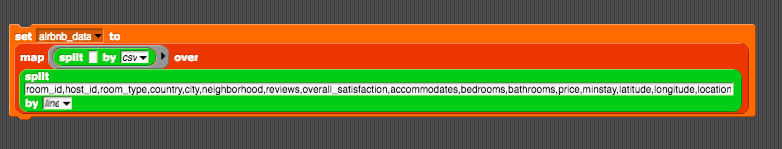

In [ ]:
airbnb_data = Table.read_table('airbnb_sf.csv')
airbnb_data

To understand what information you have, it is important to identify the different columns in the table. You can do this in Snap! by looking at the first item of the table: 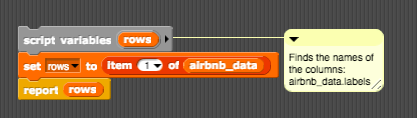 Python has this in-built function to get all the column names: 

In [ ]:
airbnb_data.labels

As you can see, this table has 16 columns. A brief description of some of the columns is given below: 

room_id: A unique number identifying an Airbnb listing

host_id: A unique number identifying an Airbnb host

room_type: One of “Entire home/apt”, “Private room”, or “Shared room”

neighborhood: A subregion of the city or search area where this data is from 

reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.

overall_satisfaction: The average rating (out of five) that the listing has received from those visitors who left a review.

accommodates: The number of guests a listing can accommodate.

bedrooms: The number of bedrooms a listing offers.

price: The price (in $US) for a night stay

minstay: The minimum stay for a visit, as posted by the host.

latitude and longitude: The latitude and longitude of the listing as posted on the Airbnb site

For the purposes of our analysis we don’t need the columns “country” or “city”. Additionally, two columns don’t have any values. Identify both those columns and then remove those columns from the table. 

This is a slightly complicated function in Snap! Since there is no in-built function, we want to select all the items in each row besides the items 4 and 5 of each row (which correspond to the column numbers of 'country' and 'city'). We can do this as below: 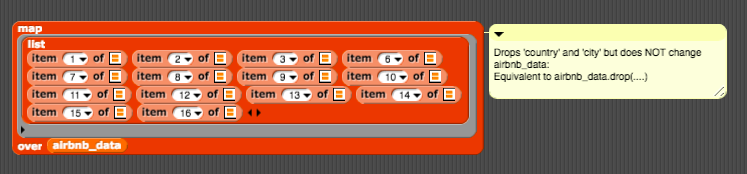

Don't worry if you are confused about how the above Snap! function works, it is a little complicated! Ask a Lab assistant or a TA to help you if you want to understand how it works. 

Luckily, Python has a built-in function that you can use to remove the columns you don’t want from a table using the following command: airbnb_data.drop - Open one parenthesis and click shift + tab to read the documentation required for the command. For reference, this is what it should look like: 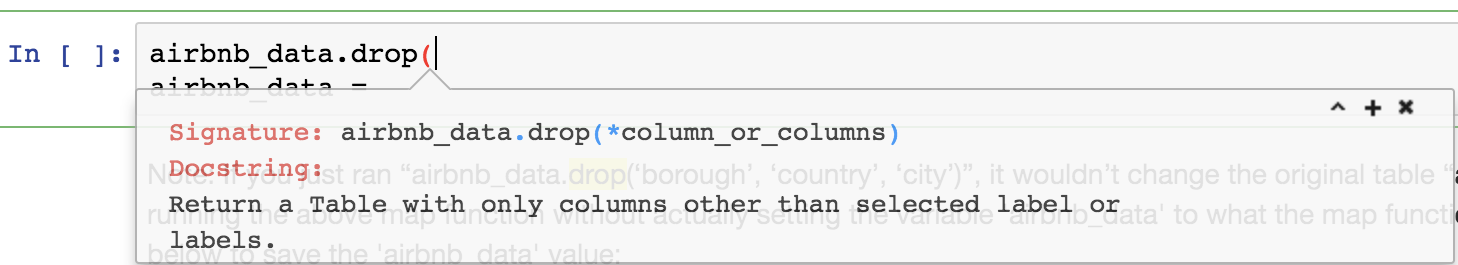

In [ ]:
airbnb_data = airbnb_data.drop('borough', 'country', 'city')

Note: If you just ran “airbnb_data.drop(‘borough’, ‘country’, ‘city’)”, it wouldn’t change the original table “airbnb_data”. This is because it is equivalent to running the above map function without actually setting the variable 'airbnb_data' to what the map function returns. In Snap!, you would do what is shown below to save the 'airbnb_data' value: 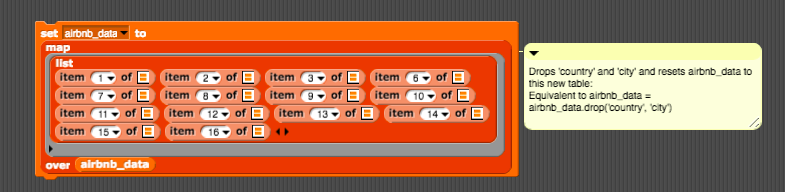 

In Python, it is important to assign “airbnb_data” to the new table using the assignment statement (=) above so that future references to the table don’t have the columns you don’t want. 

Some of the columns have very long names. Relabel three columns (“overall_satisfaction”, “latitude”, and “longitude”) with these new column names (“satisfaction”, “lat” and “long”). In Snap! we would replace the column names (which are the items in the first column of the table) using: 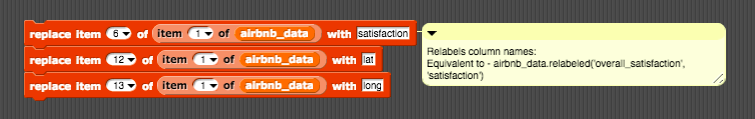 

Python has a built-in function for this purpose. Use the following command for all three columns:

In [ ]:
airbnb_data = airbnb_data.relabeled('overall_satisfaction', 'satisfaction')
    
##Do the same for the remaining two columns 

As we mentioned before, most data that you find on the internet will often have missing or unusual values which you should usually remove before starting your analysis. One column in the above table has several “xxx” values. To look at the values in one column you can use the command airbnb_data.column (‘Column Name’). While it is possible to write a Snap! script for this, it is unnecessarily complicated so we will stick to using Python commands for this one. Use this command to find the one column which has “xxx” values. Then delete the rows with those values using the command airbnb_data.where(‘Column_Name’,  are.not_equal_to(‘xxx’))

In [ ]:
#Use this cell for scratch work 


In [ ]:
Column_with_xxx_vals = ...

#Remove the xxx values 

# Data Analysis 

Now that we have cleaned the data, it’s time to analyze the data. Analyzing data helps you make decisions backed up by quantitative evidence which is becoming increasingly important in every industry. The following part of the lab will show you how to implement a range of different functions to better analyze your data and find the information that is important to you. For example: if you were interested in finding the average prices of Airbnb listings in SF or analyzing how Airbnb listings in a specific neighborhood differ from others, you can use the functions shown below to find all of this information. 

## Sorting

As a starting point, let's try sorting our data. The SORT function allows us to sort a table by the values in a particular column.

In [ ]:
# Sort our table alphabetically by neighborhood
airbnb_data = airbnb_data.sort('neighborhood')
airbnb_data

Notice that the table is now sorted alphabetically by neighborhood. (By default, the SORT function sorts in increasing order.)

Calling SORT on a table does not alter the table. Instead, it returns a new table that is sorted accordingly. By reassigning the variable 'airbnb_data' to the result of calling the SORT function, when we access 'airbnb_data' in the second line, the data is now sorted. If we did not reassign the variable, the sorting would not persist. Consider the following example.

In [ ]:
airbnb_data.sort('price') # sort the table by the price column
airbnb_data # the table displayed is still sorted by neighborhood, not by price!

## Accessing and Manipulating Data

### Column and Item
The functions COLUMN and ITEM allow us to select particular columns from a table, and particular values in a column, respectively. 

COLUMN takes as input a string, and returns the column whose label matches the string. This allows us to select a given column from a table. Each column is a stored as an np array of values. An np array in Python is very similar to a list in the sense that it is also used to store values. However, np arrays typically have more functionality as you will see below. we We can apply functions to a column in order to investigate the data.
    
ITEM takes as input an integer and returns the value at that index in the array.

In [ ]:
airbnb_data.column('price') # the output is an np array 

Note: An np array is output as shown above - array([150,  45,  59, ...,  56,  60,  39]) while a normal Python list is output as - [1, 2, 3, 4]. 

In [ ]:
price_list = airbnb_data.column('price') # store the price array 
print(price_list.item(2)) # print the price at the 2nd position of the np array 
print(len(price_list)) # print the length of the price array 

In [ ]:
airbnb_data.column('neighborhood').item(0) # get the 0th item in the neighborhood column

The above command could have been done in Snap! using this script: 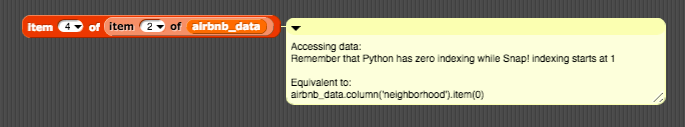

While Snap! has enough functionality to be able to perform most of these commands, Python has in-built libraries which allow you to do it more easily and efficiently. For the remaining functions after this, we will focus on how to use the Python functions. If you are interested in learning how to do this in Snap!, feel free to try it yourself or ask in Lab! 

Now, using both sorting and accessing methods, find the price of the most expensive listing in San Francisco. 
(Hint: Take a look at the documentation for the SORT command to see how to sort in a different order.)

In [ ]:
# Find the price of the most expensive listing
top_price = ...

A column is an np array of values, and we can apply many different functions to a column in order to gain insight into the data. Using the "np.mean" function, which takes as input a np array, find the average price of a listing. 

Note: You cannot call np.mean on a normal Python list, this function has to take in an np array as an input. 

In [ ]:
# Find the average price of a listing
avg_price = ...

Now that we know what the average price of a listing is, let's try comparing the price of each listing to the average. Using the WITH_COLUMN function, we can append more columns to the end of our table. This is often useful if we want to include additional information in our table. 

The WITH_COLUMN function takes in the name of the new column, and an np array of values for that column. Since we want to compare the price of each listing to the average, we want to essentially compare the values in the 'price' column with the avg_price calculated above. 

One cool thing about np arrays is that when you call it with a certain function, it applies that function to each value within the array. So for example if you run the command given below, Python will look at each value in the price array compare it to 300 and then set the value in the returned array to False if the value is less than 300 and True otherwise. 

In [ ]:
airbnb_data.column('price')>300 

The following example shows how the WITH_COLUMN function can be used.

In [ ]:
airbnb_data.with_column('expensive', airbnb_data.column('price')>300)

In this example, we started with our table and added an additional column labeled "expensive" which contains boolean values, based on whether or not the price of a listing is above $300 or not. Notice that because we did not reassign airbnb_data to the result of the call, our change is not saved. If we access airbnb_data now, the "expensive" column will not be shown.

Now, add a column to the table, labeled "diff from avg" that shows by how much the price of a listing is away from the average price. (Hint: The np.abs function might be helpful.)

Then, once you have added this column, add another column to the table, labeled "near avg" that is True if the listing is within 50 dollars of the average, and False otherwise.

In [ ]:
# Add the difference from average column to the table
airbnb_data = ...

###  Select and Where

If we want to create a new table from a particular set of columns in our current table, we can accomplish this using the SELECT function, as demonstrated below. Once again, the SELECT function does not affect the table it's called from. Instead it returns a new table containing only the specified columns.

In [ ]:
# Create a new table of the room ID and the price of the room.
room_to_price = airbnb_data.select('room_id', 'price')
room_to_price

What if we only want to select some of the data, for example only those rooms that have a price within a certain range? The WHERE function allows us to return a table consisting of the same columns as the starting table, but with only those rows that satisfy a given condition. This could be done by using a combination of HOFs like "keep" and "map" in Snap! 

The first argumet to WHERE is the label of a particular column. The second argument is a condition. For each row, if the value in the column specified by the first argument satisfies the condition, the row is included in the returned table. If it does not satisfy the condition, the row is excluded.

The following example creates a table consisting of listings in the Financial District.

In [ ]:
# Return only those rows in the Financial District neighborhood
airbnb_data.where('neighborhood', are.equal_to('Financial District'))

There are multiple conditions that the WHERE function can take in. Some of them are shown below (*taken from DS8). Note that x and y are numbers, STRING is a string, and Z is either a number or a string. 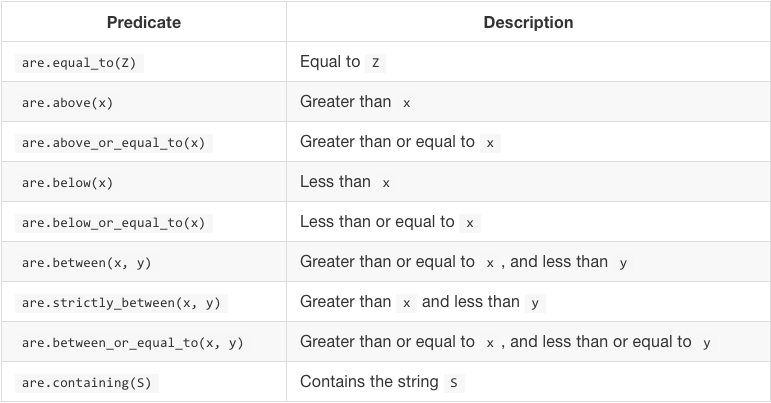

For each of the following, use a where command to select the appropriate listings.

1. Find all listings that have a price greater than or equal to $500

2. Find all listings in the Mission neighborhood that have a price less than or equal to $1000.

3. Find all listings with latitude values between 37.76 and 37.78, and longitude values between -122.50 and -122.47.

4. Find all listings with an average rating of at least 4, and more than 3 bedrooms.

In [ ]:
# Question 1

In [ ]:
# Question 2

In [ ]:
# Question 3

In [ ]:
# Question 4

### Data Visualization 

Aside from using traditional analysis techniques by manipulating the table, we can also analyze the data visually. Data visualization gives you a unique way to find trends in your data in a graphical way and also visualize your results to make it easy for you and your audience to understand.

First, let’s see the average distribution of prices for a one night stay in an Airbnb in San Francisco. 

Use the Table.bar(‘column name’) command to plot a bar chart of average prices per night. You can find the documentation here - http://data8.org/datascience/_autosummary/datascience.tables.Table.bar.html#datascience.tables.Table.bar. 

In [ ]:
bar_table = airbnb_data.select('bedrooms', 'price') 
bar_table = bar_table.sort('price')
##Plot a bar chart using bar_table 

Based on your findings, what is the most common range or prices in the city? 

Another interesting thing to look at would be whether price of a one night stay at an Airbnb location is related to the satisfaction of previous guests at that location. First, create a new table with only those two columns using the following command: 

In [ ]:
scatter_table = airbnb_data.select('satisfaction', 'price') 

Then use this new table to plot a scatter plot using scatter_table.scatter(‘price’). 

In [ ]:
##Draw a scatter plot here 
scatter_table.scatter('price')

You will notice that in the above scatter plot, there are several 0 values for satisfaction. These are likely listings where people didn't leave reviews so no satisfaction rating was recorded. When we are analyzing if prices are affected by previous guests' satisfaction, it doesn't make sense to look at the data points which have satisfaction values = 0. To fix this: 
1. First create a new table which only keeps the rows where satisfaction is not equal to 0 (think about how you can use the 'where' function to do this). 
2. Then, create another scatter_table_2 (using the same code we used above) but replace airbnb_data with your new table created in Step 1 and plot the new scatter plot. 

In [ ]:
#Create a new table where satisfaction != 0 


#Create scatter_table_2 


#Draw the scatter plot 

What do your results show? Is price related to average ratings of previous guests? 

# [Extra for experience] Explore

Now it's your turn to explore a data set from scratch. The file - titanic_data.csv is a list of passengers on the Titanic. Using this dataset, answer the following questions.

1. What percent of passengers onboard the Titanic survived?
2. How did the class of a passenger affect their chance of survival?


# Conclusion 

Congrats on getting an idea of what data science looks like! As you saw with this lab, it may be useful for Airbnb hosts to use this data to see what price they can charge or if rooms in specific location in SF may be more popular than others. As more and more data is becoming available to us, all businesses and organizations have started using data analytics to streamline their operations, maximize profits etc. so it is a very applicable field that uses computer science. 